## TASK 1: IMPORT PACKAGES AND LOAD DATA

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path = '/Users/PC/Documents/NamNguyen/WorkSpace/Others/Projects for Data Science/Project_1/data/'
df = pd.read_csv(path + 'sales2019_1.csv')
#dataframe 
df.head(20)  # Show the number of rows you want

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [3]:
# dataframe.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


## TASK 2: CLEAN AND PREPROCESS DATA

### Task 2.1 Merge 12-month data

In [4]:
frames = []
total_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        each_month_length = len(df1.index)
        total_length.append(each_month_length)

df = result
df.to_csv('annualSales2019.csv', index = False)

### 2.2 ADD 'MONTH' COLUMN


In [5]:
df['Month'] = df['Order Date'].str.slice(0,2,1)   # start = 0, stop = 2, step = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [6]:
set(df['Month']) 

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Or',
 nan}

### 2.3 Get rid of NaN and Or values

In [7]:
# Get rid of NaN value
df = df.dropna(how = 'all')
# Get rid of OR value
df = df[df['Month'] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## TASK 3: Reporting


### 3.1 What was the best month for sales ? How much was earned that month ? 

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')


In [9]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)


int8
float32


In [10]:
# Create Sales Column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990


In [11]:
# Move column Sales after column Price Each
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [12]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\748672857.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value = df.groupby('Month').sum()['Sales']


Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [13]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\612898388.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value = df.groupby('Month').sum()['Sales']


4613443.5

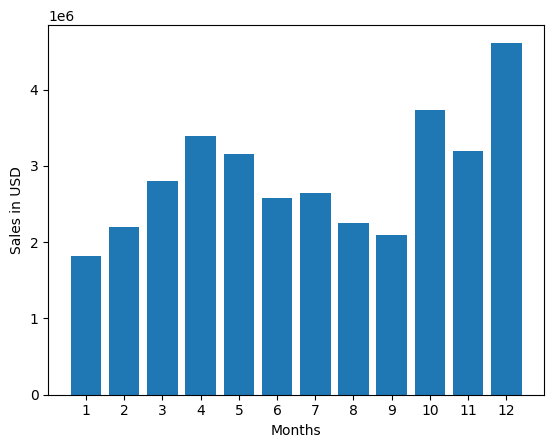

In [14]:
# Draw bar chart
months = range(1,13)
plt.bar(x = months, height= sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### 3.2 What city has the best sales?


In [15]:
city_address = lambda address:address.split(',')[1]

In [16]:
df['City'] = df['Purchase Address'].apply(city_address)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [24]:
df.groupby('City').sum()['Sales']

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\2445985979.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City').sum()['Sales']


City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [29]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3451846393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value_city = df.groupby('City').sum()['Sales']


8262204.0

In [40]:
cities = []
for city, sale in sales_value_city.items():
    cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


Text(0, 0.5, 'Sales values per city')

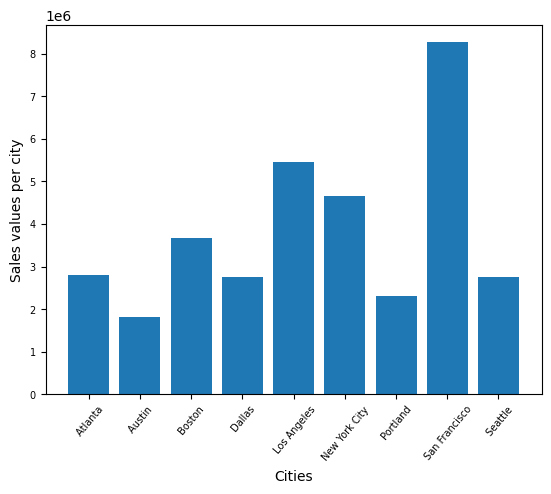

In [41]:
# Draw a bar chart 
plt.bar(x = cities, height= sales_value_city)
plt.xticks(cities, rotation = 50, size = 7)
plt.yticks(size = 7)
plt.xlabel('Cities')
plt.ylabel('Sales values per city')

In [37]:
print(cities)
print(sales_value_city)

[' Boston' ' Portland' ' San Francisco' ' Los Angeles' ' Austin'
 ' Atlanta' ' Seattle' ' New York City' ' Dallas']
City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


### 3.3 What time should we display ads to maximize the likelihood of customer's buying products?


In [44]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [43]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [51]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Time,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11,11


In [58]:
sales_value_hours = df.groupby('Hours').sum()['Sales']
hours = []
for hour, sale in sales_value_hours.items():
    hours.append(hour)

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\1047011143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value_hours = df.groupby('Hours').sum()['Sales']


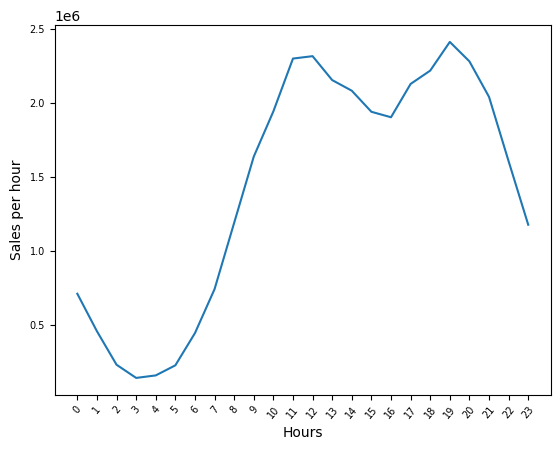

In [59]:
# Draw line chart
plt.plot(hours, sales_value_hours)
plt.xticks(hours, rotation = 50, size = 7)
plt.yticks(size = 7)
plt.xlabel('Hours')
plt.ylabel('Sales per hour')
plt.show()
